In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simulation Class

In [374]:
class Simulation:
    def __init__(self,dx=1,dt=0.05,B=100,signal_lenght=10,veto_lenght=30,fluxmeno=0.055,fluxpiu=0.045, taumeno=0.163,taupiu=22.2,lunghezza_scintillatore=7,larghezza_scintillatore=15):
        self.signal=0
        self.signalcounter=0
        self.grid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Thetagrid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Phigrid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Bgrid=B*np.ones([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.taupiu=taupiu
        self.taumeno=taumeno
        self.dt=dt
        self.dx=dx
        self.p_arrivemeno=fluxmeno*dt*dx**2
        self.p_arrivepiu=fluxpiu*dt*dx**2
        self.p_decaymeno=dt/self.taumeno
        self.p_decaypiu=dt/self.taupiu
        self.signal_lenght=(signal_lenght/dt + 0.5)//1
        self.veto_lenght=(veto_lenght/dt +0.5 )//1
        self.g=1

    def grid_step(self):
        change=False
        tempgrid=self.grid
        maskarrmeno= (self.grid==0) & (np.random.rand(*self.grid.shape) < self.p_arrivemeno)
        maskarrpiu= (self.grid==0) & (np.random.rand(*self.grid.shape) < self.p_arrivepiu)
        maskdecaymeno= (self.grid==1) & (np.random.rand(*self.grid.shape) < self.p_decaymeno)
        maskdecaypiu= (self.grid==2) & (np.random.rand(*self.grid.shape) < self.p_decaypiu)
        
        self.grid[maskdecaymeno]=0
        self.grid[maskdecaypiu]=0

        if np.any(self.grid != tempgrid):
            change=True

        self.grid[maskarrmeno]=1
        self.Thetagrid[maskarrmeno]=np.random.rand(*self.Thetagrid.shape)[maskarrmeno]*np.pi
        self.Phigrid[maskarrmeno]=np.random.rand(*self.Phigrid.shape)[maskarrmeno]*np.pi
        
        self.grid[maskarrpiu]=2
        self.Thetagrid[maskarrpiu]=np.random.rand(*self.Thetagrid.shape)[maskarrpiu]*np.pi
        self.Phigrid[maskarrpiu]=np.random.rand(*self.Phigrid.shape)[maskarrpiu]*np.pi+np.pi

        self.Phigrid[self.grid==1]=(self.Phigrid[self.grid==1]+self.Bgrid[self.grid==1]*self.dt*self.g)%(2*np.pi)
        self.Phigrid[self.grid==2]=(self.Phigrid[self.grid==2]-self.Bgrid[self.grid==2]*self.dt*self.g)%(2*np.pi)
        self.Phigrid[self.grid==0]=0

        return change

    def digital_signal_step(self,change):
        if (change):

            self.signal.counter=self.singnal_lengh

        if (self.signal.counter>0):
            self.signal=True
            self.signal.counter=self.signal.counter-1

        if (self.signal.counter<0):
            self.signal=False
            self.signal.counter=self.signal.counter+1
        

        

    def time_step(self):
        change=grid_step()
        digital_signale_step(change)


0.00225
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  6.11107609 0.         0.        ]
 [0.         5.86416296 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

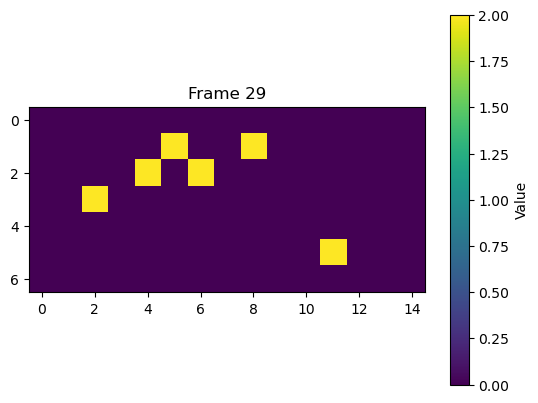

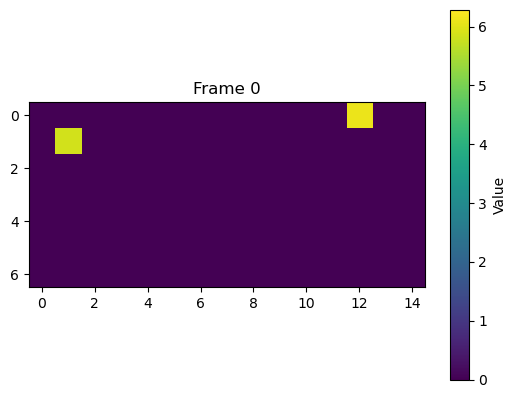

In [378]:
Sistema=Simulation()
Sistema.grid_step()

matrices = []
matrices2 = []
num_frames=30

print(Sistema.p_arrivepiu)

for i in range(num_frames):
    Sistema.grid_step()
    matrices.append(np.copy(Sistema.grid))
    matrices2.append(np.copy(Sistema.Phigrid))

    
for i in range(num_frames):
    print(matrices2[i])


#Plot 1
fig, ax = plt.subplots()
cax = ax.imshow(matrices[0], cmap='viridis', interpolation='none',vmin=0, vmax=2)

colorbar = fig.colorbar(cax, ax=ax)
colorbar.set_label('Value')

def update(frame):
    cax.set_array(matrices[frame])
    ax.set_title(f"Frame {frame}")
    return [cax]

ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=False)

ani.save("matrix_animation.gif", writer=animation.PillowWriter(fps=10))

#Plot2
fig, ax = plt.subplots()
cax = ax.imshow(matrices2[0], cmap='viridis', interpolation='none',vmin=0, vmax=(2*np.pi))

colorbar = fig.colorbar(cax, ax=ax)
colorbar.set_label('Value')

def update(frame):
    cax.set_array(matrices2[frame])
    ax.set_title(f"Frame {frame}")
    return [cax]

ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=False)

ani.save("matrix_animation2.gif", writer=animation.PillowWriter(fps=10))

In [371]:
a=np.ones([int(3.5),3])
print(a)

b=np.random.rand(3,3)
print(b)
mask= b>0.5
print(a[mask])
a[mask]=(np.random.rand(3,3)[mask]*2*np.pi)%(2*np.pi)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.11446999 0.2842189  0.16995876]
 [0.96582835 0.56369614 0.7915067 ]
 [0.88754704 0.14309793 0.05157547]]
[1. 1. 1. 1.]
[[1.         1.         1.        ]
 [3.18839003 4.17361558 6.05988802]
 [0.62492729 1.         1.        ]]


In [ ]:
%history  